# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# data loading
fraud_df = pd.read_csv('https://raw.githubusercontent.com/elvinojunior/dicoding_machine_learning_pemula/refs/heads/main/Dataset_clustering.csv')
fraud_df

,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,LoginAttempts,BalanceRatio,AmountPerLogin,TransactionHour,TransactionTime,KMeans_Cluster,Potential_Fraud
0,14.09,70.0,81.0,5112.21,1.0,0.002756,14.090000,16.0,2.0,0,False
1,376.24,68.0,141.0,13758.91,1.0,0.027345,376.240000,16.0,2.0,0,False
2,126.29,19.0,56.0,1122.35,1.0,0.112523,126.290000,18.0,2.0,0,False
3,184.50,26.0,25.0,8569.06,1.0,0.021531,184.500000,16.0,2.0,0,False
4,13.45,26.0,198.0,7429.40,1.0,0.001810,13.450000,17.0,2.0,0,False
...,...,...,...,...,...,...,...,...,...,...,...
2507,856.21,33.0,109.0,12690.79,1.0,0.067467,856.209999,17.0,2.0,0,False
2508,251.54,48.0,177.0,254.75,1.0,0.987399,251.540000,17.0,2.0,2,False
2509,28.63,56.0,146.0,3382.91,1.0,0.008463,28.630000,17.0,2.0,0,False
2510,185.97,23.0,19.0,1776.91,1.0,0.104659,185.970000,16.0,2.0,0,False


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
# data splitting
X = fraud_df.drop(columns=["Potential_Fraud"])
y = fraud_df["Potential_Fraud"].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Menggunakan Teknik train dan test split yang dibagi menjadi 80% training data dan 20% testing data

In [4]:
# normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Menggunakan normalisasi dengan teknik StandartScaler

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [5]:
# melatih model menggunakan algoritma Random forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

Menggunakan algoritma RandomForestClassifier dengan menetapkan random_state ke nilai 42, kita memastikan bahwa hasil yang diperoleh dari model akan konsisten setiap kali Anda menjalankan kode tersebut.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [6]:
# melakukan prediksi data uji
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

0 : Not Fraud

1 : Fraud

dari hasil prediksi data uji di dominasi oleh transaksi NotFraud ditunjukkan dari banyaknya nilai 0, dibanding nilai 1

In [7]:
# Evaluasi menggunakan berbagai metrik
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
# Menampilkan classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9960238568588469
Precision: 0.9166666666666666
Recall: 1.0
F1 Score: 0.9565217391304348

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       481
           1       0.92      1.00      0.96        22

    accuracy                           1.00       503
   macro avg       0.96      1.00      0.98       503
weighted avg       1.00      1.00      1.00       503



Menampilkan evaluasi dan performa model seperti Accuracy, Precision, Recall, dan F1 Score

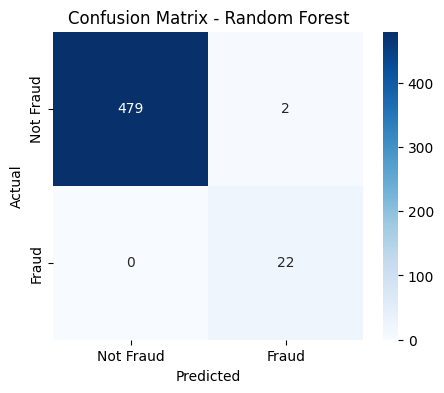

In [8]:
# membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

Confusion matrix di atas menunjukkan hasil prediksi model Random Forest untuk fraud detection :

* 479 transaksi bukan fraud diprediksi bukan fraud (True Negative)

* 2 transaksi bukan fraud diprediksi fraud (False Positive)

* 0 transaksi fraud diprediksi bukan fraud (False Negative)

* 22 transaksi fraud diprediksi fraud (True Positive)

In [9]:
scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.98756219 0.98756219 0.99253731 0.99253731 0.98753117]
Mean accuracy: 0.9895460354089899


Melakukan evaluasi lebih lanjut menggunakan cross validation untuk mengevaluasi kinerja model pada data yang tidak terlihat dengan membagi dataset menjadi beberapa subset (folds) dan melatih serta menguji model pada berbagai kombinasi data.

model kita menghasilkan Mean accuracy = 0.98

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [10]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [11]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Model Random Forest digunakan untuk mendeteksi transaksi yang berpotensi fraud. Evaluasi model menunjukkan tingkat akurasi, precision, recall, dan F1-score yang memberikan gambaran tentang kinerja model.

1. Analisis Evaluasi:
Berdasarkan confusion matrix yang ditampilkan, model Random Forest memiliki hasil sebagai berikut:
* True Positives (TP): 22 transaksi fraud terdeteksi dengan benar.
* True Negatives (TN): 479 transaksi non-fraud terdeteksi dengan benar.
* False Positives (FP): 2 transaksi non-fraud salah diklasifikasikan sebagai fraud.
* False Negatives (FN): 0 transaksi fraud yang gagal terdeteksi (tidak ada transaksi fraud yang lolos).

2. Identifikasi kelemahan model
* Precision dan Recall:

Precision untuk kelas fraud cukup tinggi karena hanya ada 2 false positives, yang berarti model jarang salah mendeteksi transaksi sebagai fraud.

Recall sangat baik karena tidak ada false negatives, artinya model berhasil menangkap semua transaksi fraud dalam dataset uji.

* Overfitting atau Underfitting:

Model tampaknya tidak mengalami underfitting, karena mampu menangkap transaksi fraud dengan baik.

Namun, potensi overfitting bisa terjadi, terutama jika model bekerja terlalu baik pada data uji tetapi kurang mampu menggeneralisasi pada data baru. Performa pada data real-world perlu diuji lebih lanjut.

3. Rekomendasi Tindakan Lanjutan
* Verifikasi dengan Data Baru:

Model perlu diuji dengan dataset yang lebih besar dan bervariasi untuk memastikan generalisasi yang baik di lingkungan nyata.

Jika performa menurun pada data baru, kemungkinan model mengalami overfitting.

* Eksplorasi Algoritma Lain:

Jika ingin meningkatkan interpretabilitas model, algoritma Decision Tree bisa menjadi alternatif.
Jika ingin meningkatkan performa lebih lanjut, metode seperti XGBoost atau LightGBM bisa dicoba.